In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def f(x):
    return 3*x**2 - 4*x + 5

In [5]:
f(3.0)

20.0

In [6]:
xs = np.arange(-5,5,0.25)
y = f(xs)
y

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

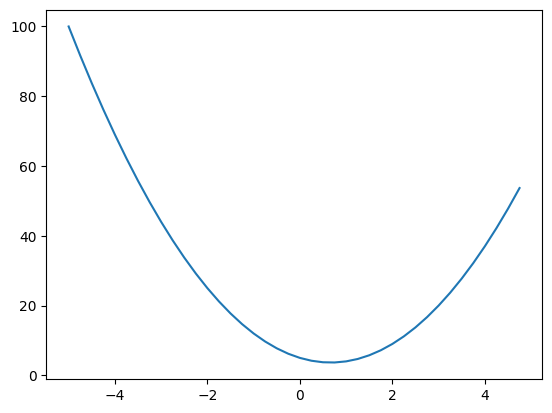

In [7]:
plt.plot(xs,y)
plt.show()

In [12]:
h = 0.00000001
x = 2/3
(f(x+h)-f(x))/h

0.0

In [14]:
a = 2.0
b = -3.0
c = 10.0
d = a*b+c
d

4.0

In [18]:
h = 0.0001
a = 2.0
b=-3.0
c=10.0
d1 = a*b+c
c+=h
d2 = a*b+c
(d2-d1)/h

0.9999999999976694

In [383]:
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data = data
        self._prev = set(_children)
        self.grad=0.0
        self._backward = lambda : None
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value : {self.data}"
    def __add__(self,other):
        out = Value(self.data+other.data,(self,other),_op='+')
        def _backward():
            self.grad=1.0*out.grad
            other.grad=1.0*out.grad
        out._backward = _backward
        return out
    def __sub__(self,other):
        out = Value(self.data-other.data,(self,other),_op='-')
        def _backward():
            self.grad=-1.0*out.grad
            other.grad=-1.0*out.grad
        out._backward = _backward
        return out
    def __mul__(self,other):
        out = Value(self.data*other.data,(self,other),_op='*')
        def _backward():
            self.grad=other.data*out.grad
            other.grad=self.data*out.grad
        out._backward = _backward
        return out
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        def _backward():
            self.grad=1-out.data**2
        out = Value(t,(self,),_op='tanh')
        out._backward = _backward
        return out

In [344]:
a = Value(2.0,label='a')

In [345]:
a

Value : 2.0

In [346]:
b = Value(3.0,label='b')

In [347]:
e = a*b

In [348]:
(a*b)._prev

{Value : 2.0, Value : 3.0}

In [349]:
a-b

Value : -1.0

In [350]:
a = Value(2.0,label='a')
b = Value(-3.0,label='b')
c = Value(10.0,label='c')
e = a*b;e.label='e'
d = e+c;d.label='d'
f = Value(-2.0,label='f')
L = d * f; L.label='L'

In [351]:
d._prev

{Value : -6.0, Value : 10.0}

In [365]:
from graphviz import Digraph
def trace(root):
    nodes,edges = set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges
def draw_dot(root):
    dot = Digraph(format='svg',graph_attr={'rankdir':'LR'})
    nodes,edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid,label="{ %s | data : %.4f | %.4f }" % (n.label,n.data,n.grad),shape='record')
        if n._op:
            dot.node(name=uid+n._op,label=n._op)
            dot.edge(uid+n._op,uid)
    for n1,n2 in edges:
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
    return dot

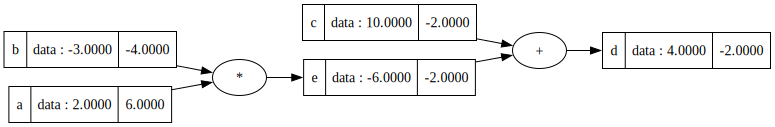

In [366]:
draw_dot(d)

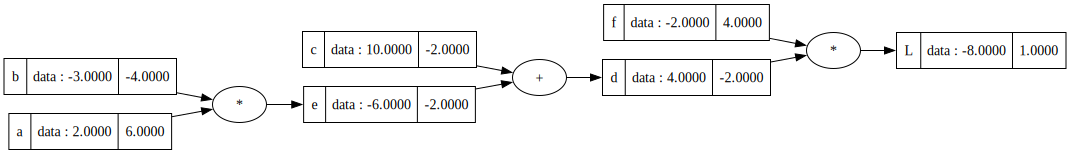

In [367]:
draw_dot(L)

In [384]:
def order():
    a = Value(2.0,label='a')
    b = Value(-3.0,label='b')
    c = Value(10.0,label='c')
    e = a*b;e.label='e'
    d = e+c;d.label='d'
    f = Value(-2.0,label='f')
    L = d + f; L.label='L'
    L1 = L.data
    h=0.001
    a = Value(2.0+h,label='a')
    b = Value(-3.0,label='b')
    c = Value(10.0,label='c')
    e = a*b;e.label='e'
    d = e+c;d.label='d'
    f = Value(-2.0,label='f')
    L = d + f; L.label='L'
    L2 = L.data
    return ((L2-L1)/h)

In [385]:
order()

-3.0000000000001137

In [386]:
L.grad = 1.0

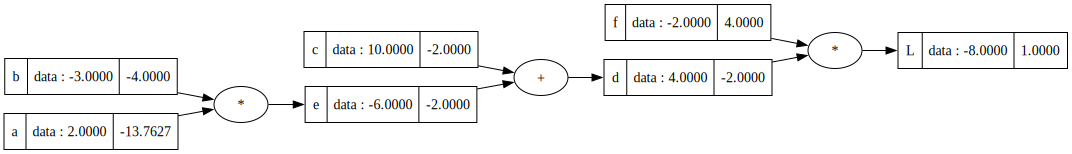

In [387]:
draw_dot(L)

In [388]:
f.grad = L.grad*d.data
d.grad=L.grad*f.data

In [389]:
e.grad = d.grad
c.grad = d.grad

In [390]:
b.grad = a.data*e.grad
a.grad = b.data*e.grad

In [407]:
# Inputs
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')
# Weights
w1 = Value(-3.0,label='w1')
w2 = Value(1.0,label='w2')
# Bias
b = Value(6.88137371,label='b')
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh();o.label='o'

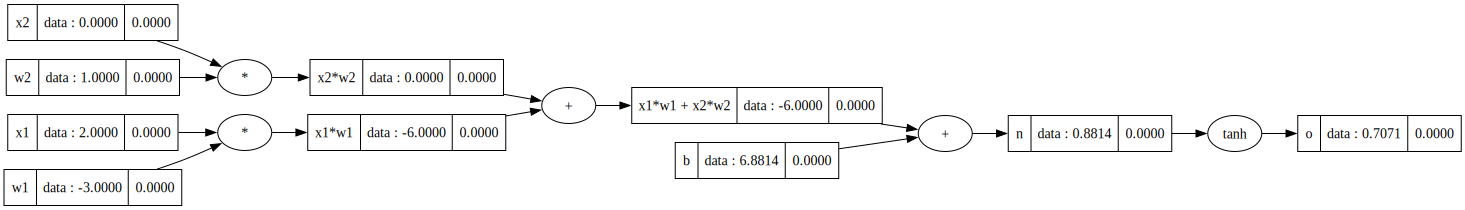

In [408]:
draw_dot(o)

In [393]:
o.grad=1.0

In [394]:
1-o.data**2

0.4999999130396886

In [398]:
o._backward()

In [400]:
n._backward()

In [402]:
x1w1x2w2._backward()

##

In [404]:
topo = []
visited = set()
def build_topo(v):
    visited.add(v)
    for child in v._prev:
        build_topo(child)
    topo.append(v)

In [405]:
build_topo(o)
topo

[Value : 6.88137371,
 Value : 1.0,
 Value : 0.0,
 Value : 0.0,
 Value : 2.0,
 Value : -3.0,
 Value : -6.0,
 Value : -6.0,
 Value : 0.8813737100000001,
 Value : 0.7071068426767707]

#### Automating it with topo sort + backpropagation

In [409]:
o.grad = 1.0
build_topo(o)
for node in reversed(topo):
    node._backward()

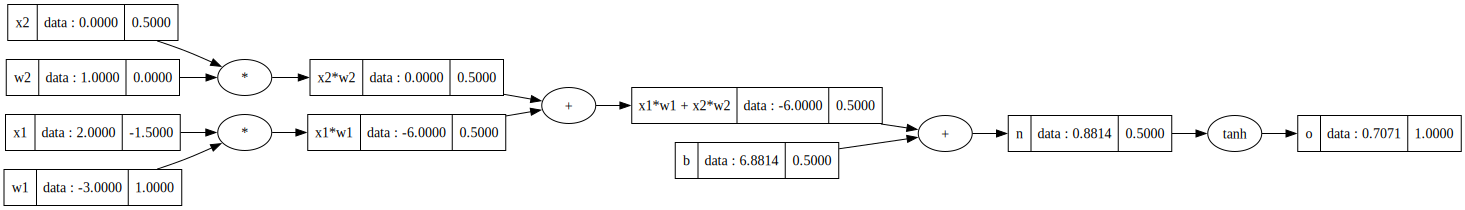

In [410]:
draw_dot(o)

## Works wow 

In [696]:
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data = data
        self._prev = set(_children)
        self.grad=0.0
        self._backward = lambda : None
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value : {self.data}"
    def __neg__(self):
        return self * -1
    def __add__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data+other.data,(self,other),_op='+')
        def _backward():
            # Gradient gets added in multivariable as one thing can be used multiple times in same variable
            self.grad+=1.0*out.grad
            other.grad+=1.0*out.grad
        out._backward = _backward
        return out
    def __sub__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data-other.data,(self,other),_op='-')
        def _backward():
            # Gradient gets added in multivariable as one thing can be used multiple times in same variable
            self.grad+=-1.0*out.grad
            other.grad+=-1.0*out.grad
        out._backward = _backward
        return out
    def __mul__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data*other.data,(self,other),_op='*')
        def _backward():
            self.grad+=other.data*out.grad
            other.grad+=self.data*out.grad
        out._backward = _backward
        return out
    def __rmul__(self,other):
        return self * other
    def __pow__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        other.label=f'{other.data}'
        out = Value(self.data**other.data,(self,),f'1/{round(self.data,2)}')
        out.label=f'Inv'
        def _backward():
            self.grad+=out.grad*other.data*(self.data**(other.data-1))
        out._backward = _backward
        return out
    def __truediv__(self,other):
        return self * other**-1
    def exp(self):
        x = self.data
        out = Value(math.exp(x),(self,),_op='exp')
        def _backward():
            self.grad += out.data*out.grad
        out._backward = _backward
        return out
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        def _backward():
            self.grad+=1-out.data**2
        out = Value(t,(self,),_op='tanh')
        out._backward = _backward
        return out
    # Added back propagation method
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
        build_topo(self)
        self.grad=1.0
        for node in reversed(topo):
            node._backward()

In [697]:
from graphviz import Digraph
def trace(root):
    nodes,edges = set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges
def draw_dot(root):
    dot = Digraph(format='svg',graph_attr={'rankdir':'LR'})
    nodes,edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid,label="{ %s | data : %.4f | %.4f }" % (n.label,n.data,n.grad),shape='record')
        if n._op:
            dot.node(name=uid+n._op,label=n._op)
            dot.edge(uid+n._op,uid)
    for n1,n2 in edges:
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
    return dot

In [698]:
# Inputs
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')
# Weights
w1 = Value(-3.0,label='w1')
w2 = Value(1.0,label='w2')
# Bias
b = Value(6.88137371,label='b')
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh();o.label='o'

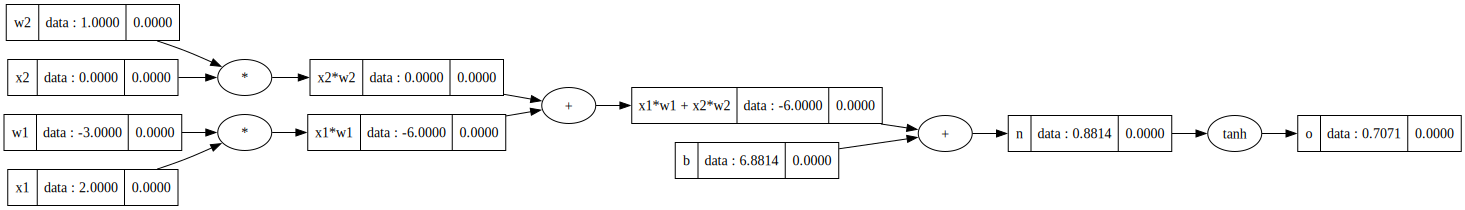

In [699]:
draw_dot(o)

In [700]:
o.backward()

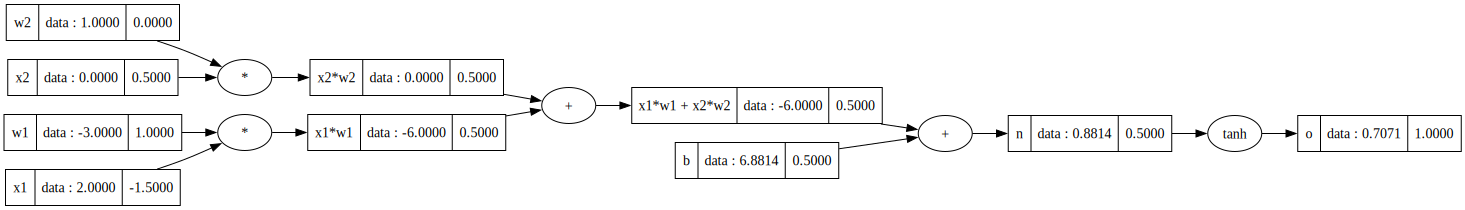

In [701]:
draw_dot(o)

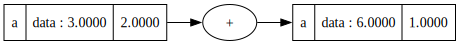

In [702]:
a = Value(3.0,label='a')
b = a + a; b.label='a'
b.backward()
draw_dot(b)

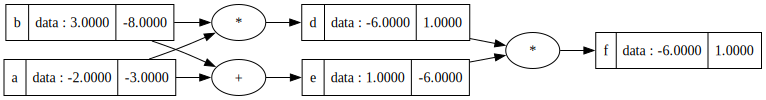

In [703]:
a = Value(-2.0,label='a')
b = Value(3.0,label='b')
d = a*b; d.label='d'
e = a + b; e.label='e'
f = d*e;f.label='f'

f.backward()
draw_dot(f)

In [704]:
# Inputs
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')
# Weights
w1 = Value(-3.0,label='w1')
w2 = Value(1.0,label='w2')
# Bias
b = Value(6.88137371,label='b')
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh();o.label='o'
# Relevant example

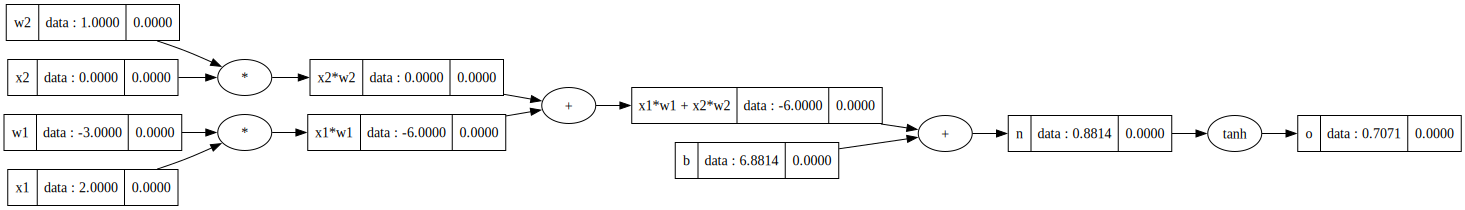

In [705]:
draw_dot(o)

In [706]:
a = Value(2.0)
a+1

Value : 3.0

In [707]:
2*a

Value : 4.0

In [708]:
(2*a).exp()

Value : 54.598150033144236

In [709]:
a = 2
c = Value(2.0);c.label='c'

In [710]:
b = a*c;b.label='b'

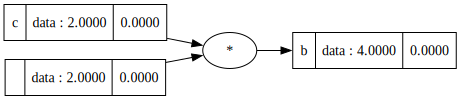

In [711]:
draw_dot(b)

In [712]:
b.grad=1

In [713]:
b.backward()

In [714]:
a = Value(2.0)
b = Value(4.0)

In [715]:
a/b

Value : 0.5

In [716]:
# Inputs
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')
# Weights
w1 = Value(-3.0,label='w1')
w2 = Value(1.0,label='w2')
# Bias
b = Value(6.88137371,label='b')
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh();o.label='o'
# Relevant example

In [717]:
o.backward()

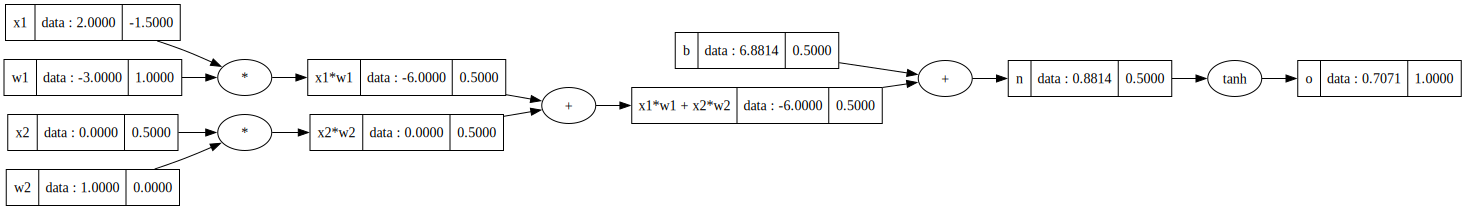

In [718]:
draw_dot(o)

In [719]:
# Inputs
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')
# Weights
w1 = Value(-3.0,label='w1')
w2 = Value(1.0,label='w2')
# Bias
b = Value(6.88137371,label='b')
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'

In [720]:
c = Value(2.0);c.label='2'
k  = c*n;k.label='2*n'
exp = k.exp();exp.label='e'

In [721]:
e = Value(1.0);e.label='1'

In [722]:
up = exp - e;up.label='e2x-1'

In [723]:
down = exp + e;down.label='e2x+1'

In [724]:
o = up/down;o.label='sigmoid'

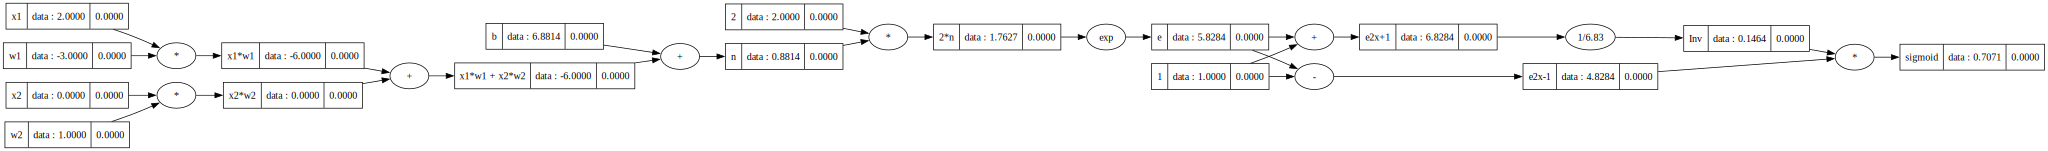

In [725]:
draw_dot(o)

In [1108]:
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data = data
        self._prev = set(_children)
        self.grad=0.0
        self._backward = lambda : None
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value : {self.data}"
    def __neg__(self):
        return self * -1
    def __add__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data+other.data,(self,other),_op='+')
        def _backward():
            # Gradient gets added in multivariable as one thing can be used multiple times in same variable
            self.grad+=1.0*out.grad
            other.grad+=1.0*out.grad
        out._backward = _backward
        return out
    def __sub__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data-other.data,(self,other),_op='-')
        def _backward():
            # Gradient gets added in multivariable as one thing can be used multiple times in same variable
            self.grad+=1.0*out.grad
            other.grad+=-1.0*out.grad
        out._backward = _backward
        return out
    def __mul__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data*other.data,(self,other),_op='*')
        def _backward():
            self.grad+=other.data*out.grad
            other.grad+=self.data*out.grad
        out._backward = _backward
        return out
    def __rmul__(self,other):
        return self * other
    def __pow__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        other.label=f'{other.data}'
        out = Value(self.data**other.data,(self,),f'1/{round(self.data,2)}')
        out.label=f'Inv'
        def _backward():
            self.grad+=out.grad*other.data*(self.data**(other.data-1))
        out._backward = _backward
        return out
    def __truediv__(self,other):
        return self * other**-1
    def exp(self):
        x = self.data
        out = Value(math.exp(x),(self,),_op='exp')
        def _backward():
            self.grad += out.data*out.grad
        out._backward = _backward
        return out
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        def _backward():
            self.grad+=(1-out.data**2)*out.grad
        out = Value(t,(self,),_op='tanh')
        out._backward = _backward
        return out
    # Added back propagation method
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
        build_topo(self)
        self.grad=1.0
        for node in reversed(topo):
            node._backward()

## Final class for micrograd

In [1109]:
import random
class Neuron:
    def __init__(self,nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
    def __call__(self,x):
        act = sum((wi*xi for wi,xi in zip(self.w,x)),self.b)
        out = act.tanh()
        return out
x = [2.0,3.0]
n = Neuron(2)
n(x)

Value : 0.9971177803039121

In [1110]:
class Layer:
    def __init__(self,nin,nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    def __call__(self,x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs

x = [2.0,3.0]
n = Layer(2,3)
n(x)

[Value : 0.18534174961922573,
 Value : -0.9890537583699994,
 Value : 0.33072820042631723]

In [1111]:
class MLP:
    def __init__(self,nin,nouts):
        sz = [nin]+nouts
        self.layers=[Layer(sz[i],sz[i+1]) for i in range(len(nouts))]
    def __call__(self,x):
        for layer in self.layers:
            x = layer(x)
        return x

In [1112]:
import random
class Neuron:
    def __init__(self,nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
    def __call__(self,x):
        act = sum((wi*xi for wi,xi in zip(self.w,x)),self.b)
        out = act.tanh()
        return out
    def parameters(self):
        return self.w + [self.b]
class Layer:
    def __init__(self,nin,nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    def __call__(self,x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
        """
             ||  || Both equal
        params = []
        for neuron in self.neurons:
            ps = neurons.parameters()
            params.extend(ps)
        return params
        """
class MLP:
    def __init__(self,nin,nouts):
        sz = [nin]+nouts
        self.layers=[Layer(sz[i],sz[i+1]) for i in range(len(nouts))]
    def __call__(self,x):
        for layer in self.layers:
            x = layer(x)
        return x
    def parameters(self):
        return [p for layer in self.layers for neuron in layer.neurons for p in neuron.parameters()]

In [1113]:
x = [2.0,3.0]
n = MLP(2,[4,4,1])
n(x)

Value : -0.7537234407689684

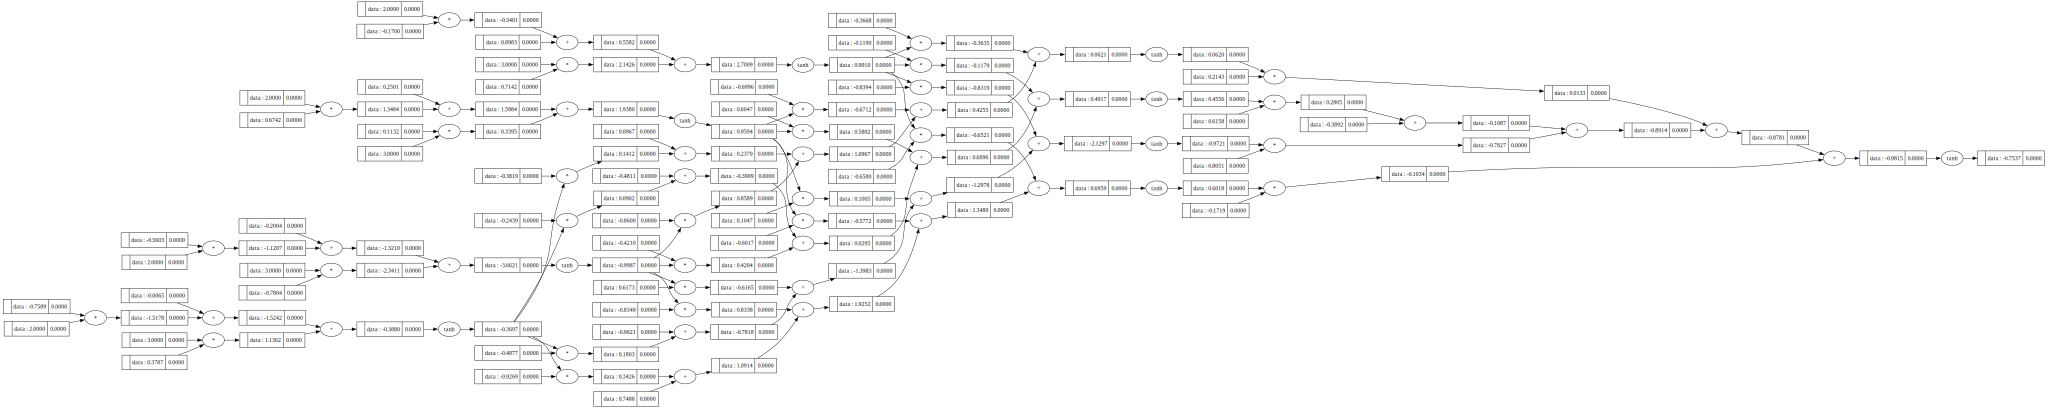

In [1114]:
draw_dot(n(x))

In [1115]:
xs = [
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0],
]
ys = [1.0,-1.0,-1.0,1.0]

In [1116]:
ypred = [n(x) for x in xs]

In [1117]:
ypred

[Value : -0.7537234407689684,
 Value : -0.45798025316180435,
 Value : -0.8192994763934466,
 Value : -0.7768798049744672]

In [1118]:
loss = [(yout-ygt)**2 for ygt,yout in zip(ys,ypred)]

In [1119]:
loss

[Value : 3.0755459067025495,
 Value : 0.2937854059625417,
 Value : 0.03265267923168257,
 Value : 3.1573018413261007]

In [1120]:
loss = sum(((yout-ygt)**2 for ygt,yout in zip(ys,ypred)),Value(0.0))

In [1121]:
loss

Value : 6.559285833222875

In [1122]:
loss.backward()

In [1123]:
n.layers[0].neurons[0].w

[Value : -0.7588824104683811, Value : 0.37873169597273026]

In [1124]:
n.layers[0].neurons[0].b

Value : -0.006468487389775568

In [1125]:
n.layers[0].neurons[0].w[0].grad

18.27992065325194

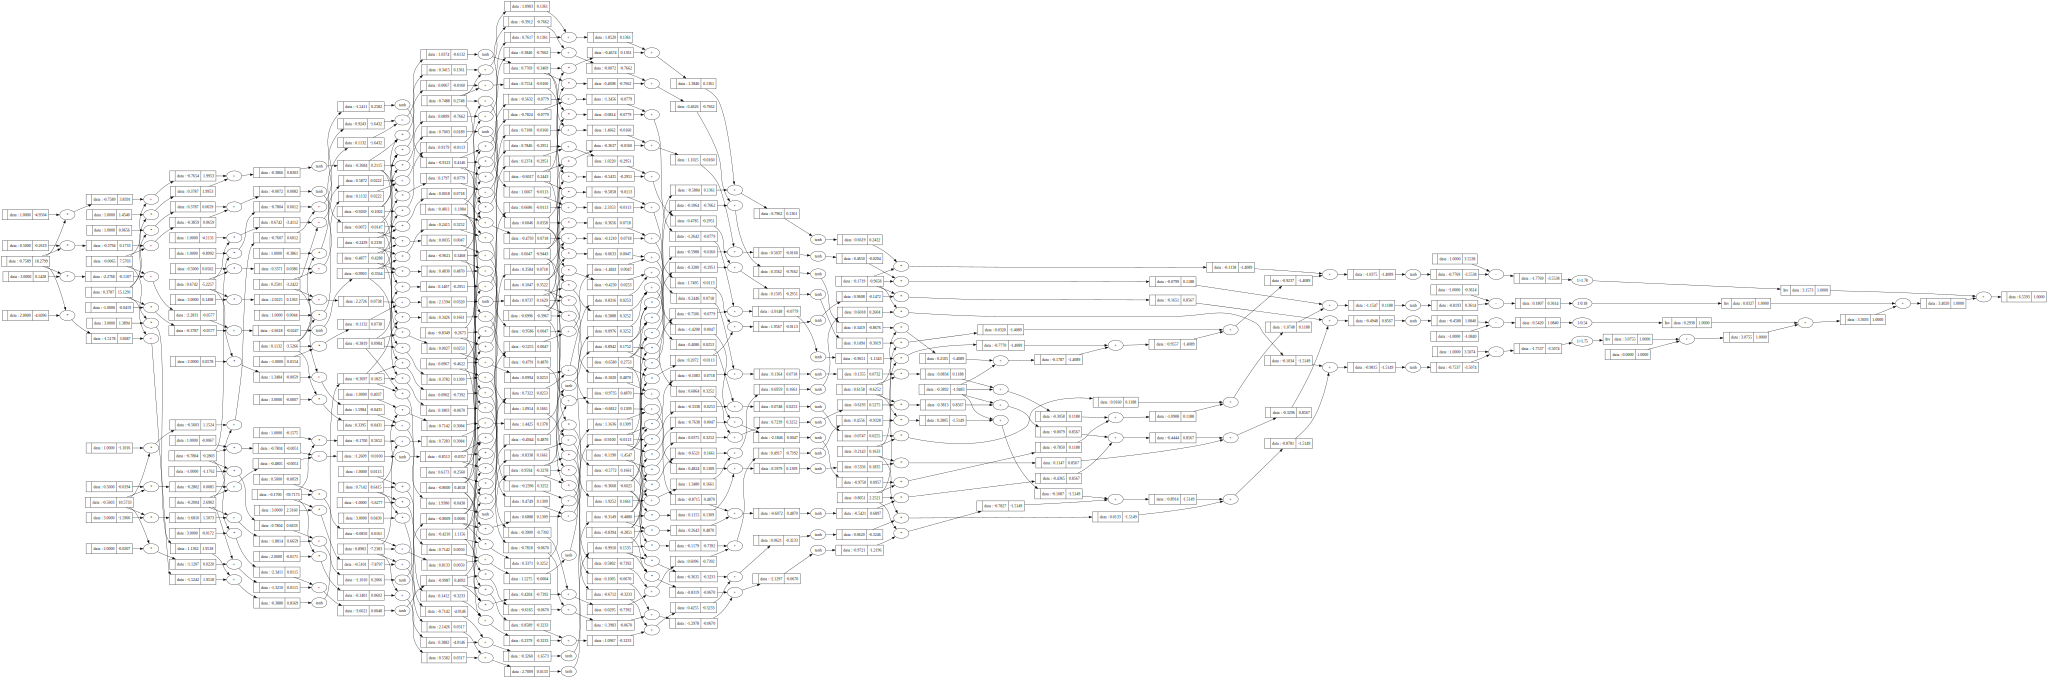

In [1126]:
draw_dot(loss)

In [1127]:
import random
class Neuron:
    def __init__(self,nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
    def __call__(self,x):
        act = sum((wi*xi for wi,xi in zip(self.w,x)),self.b)
        out = act.tanh()
        return out
    def parameters(self):
        return self.w + [self.b]
class Layer:
    def __init__(self,nin,nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    def __call__(self,x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
        """
             ||  || Both equal
        params = []
        for neuron in self.neurons:
            ps = neurons.parameters()
            params.extend(ps)
        return params
        """
class MLP:
    def __init__(self,nin,nouts):
        sz = [nin]+nouts
        self.layers=[Layer(sz[i],sz[i+1]) for i in range(len(nouts))]
    def __call__(self,x):
        for layer in self.layers:
            x = layer(x)
        return x
    def parameters(self):
        return [p for layer in self.layers for neuron in layer.neurons for p in neuron.parameters()]

In [1128]:
n.parameters()

[Value : -0.7588824104683811,
 Value : 0.37873169597273026,
 Value : -0.006468487389775568,
 Value : -0.5603273096989889,
 Value : -0.7803575363086908,
 Value : -0.2003861572195107,
 Value : 0.6741817506363383,
 Value : 0.11317705278031509,
 Value : 0.2500689071532618,
 Value : -0.17003580695846332,
 Value : 0.7142039962451261,
 Value : 0.8983182110132808,
 Value : -0.24390961728360483,
 Value : -0.42095110695266613,
 Value : 0.6047286353168495,
 Value : -0.11897010656997997,
 Value : -0.4811004666999035,
 Value : -0.4877254454631961,
 Value : 0.6173198666520339,
 Value : 0.10473343616477382,
 Value : -0.8393853956518067,
 Value : -0.9620857248753738,
 Value : -0.38190968331271224,
 Value : -0.8600239855680083,
 Value : -0.6996170366112944,
 Value : -0.36678823083779255,
 Value : 0.09667119537580882,
 Value : -0.9268716245979278,
 Value : -0.8349108160560097,
 Value : -0.6016534207167357,
 Value : -0.6580056648283212,
 Value : 0.7487767836400556,
 Value : 0.6157650701699131,
 Value : 0

In [1129]:
xs = [
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0],
]
ys = [1.0,-1.0,-1.0,1.0]
ypred = [n(x) for x in xs]

In [1130]:
loss = sum(((yout-ygt)**2 for ygt,yout in zip(ys,ypred)),Value(0.0))

In [1131]:
loss.backward()

In [1132]:
loss

Value : 6.559285833222875

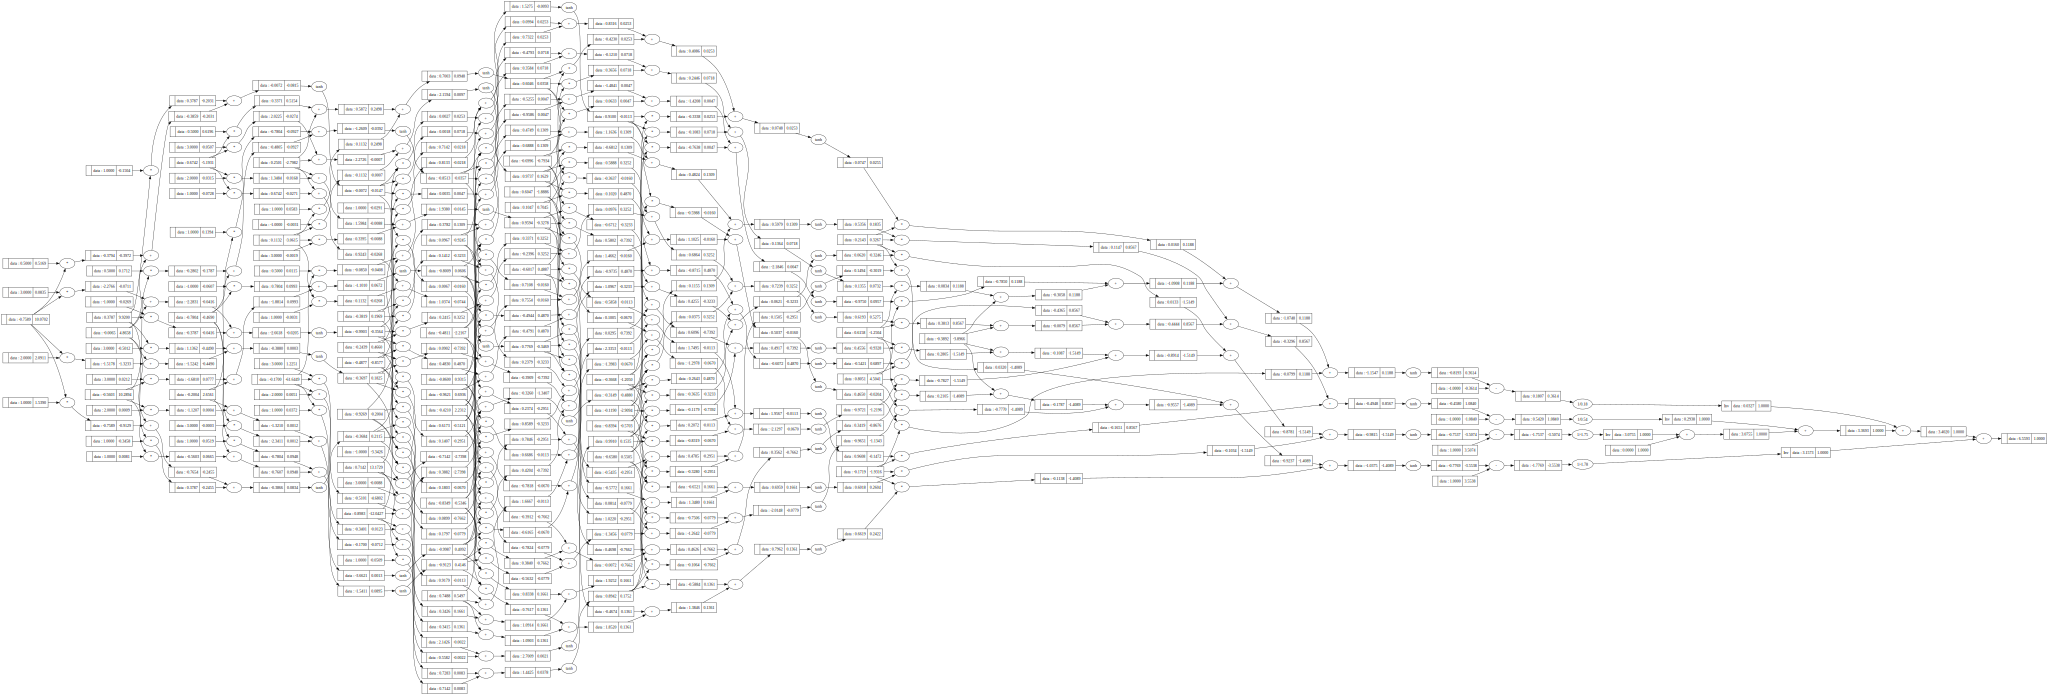

In [1133]:
draw_dot(loss)

In [1134]:
n.layers[0].neurons[0].w[0].data

-0.7588824104683811

In [1135]:
n.layers[0].neurons[0].w[0].grad

10.070156837315553

In [1136]:
n.parameters()

[Value : -0.7588824104683811,
 Value : 0.37873169597273026,
 Value : -0.006468487389775568,
 Value : -0.5603273096989889,
 Value : -0.7803575363086908,
 Value : -0.2003861572195107,
 Value : 0.6741817506363383,
 Value : 0.11317705278031509,
 Value : 0.2500689071532618,
 Value : -0.17003580695846332,
 Value : 0.7142039962451261,
 Value : 0.8983182110132808,
 Value : -0.24390961728360483,
 Value : -0.42095110695266613,
 Value : 0.6047286353168495,
 Value : -0.11897010656997997,
 Value : -0.4811004666999035,
 Value : -0.4877254454631961,
 Value : 0.6173198666520339,
 Value : 0.10473343616477382,
 Value : -0.8393853956518067,
 Value : -0.9620857248753738,
 Value : -0.38190968331271224,
 Value : -0.8600239855680083,
 Value : -0.6996170366112944,
 Value : -0.36678823083779255,
 Value : 0.09667119537580882,
 Value : -0.9268716245979278,
 Value : -0.8349108160560097,
 Value : -0.6016534207167357,
 Value : -0.6580056648283212,
 Value : 0.7487767836400556,
 Value : 0.6157650701699131,
 Value : 0

In [1137]:
xs = [
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0],
]
ys = [1.0,-1.0,-1.0,1.0]

In [1138]:
ypred = [n(x) for x in xs]
loss = sum(((yout-ygt)**2 for ygt,yout in zip(ys,ypred)),Value(0.0))
loss

Value : 6.559285833222875

In [1139]:
loss.backward()

In [1140]:
for p in n.parameters():
    p.data += 0.01 * p.grad

In [1141]:
ypred = [n(x) for x in xs]
loss = sum(((yout-ygt)**2 for ygt,yout in zip(ys,ypred)),Value(0.0))
loss

Value : 7.776604782412694

In [1146]:
epochs = 30

In [1147]:
for i in range(epochs):
    ypred = [n(x) for x in xs]
    loss = sum(((yout - ygt)**2 for ygt, yout in zip(ys, ypred)), Value(0.0))
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()
    for p in n.parameters():
        p.data += -0.01 * p.grad
    print(f"Epoch {i+1} | Loss: {loss.data}")

Epoch 1 | Loss: 1.787246253192075
Epoch 2 | Loss: 1.8676198353091253
Epoch 3 | Loss: 1.9191385897419642
Epoch 4 | Loss: 1.9011827498441412
Epoch 5 | Loss: 1.722904778575994
Epoch 6 | Loss: 1.872818177837967
Epoch 7 | Loss: 1.3500353526737028
Epoch 8 | Loss: 1.2786678316080997
Epoch 9 | Loss: 1.2268183825724512
Epoch 10 | Loss: 1.1570742335465054
Epoch 11 | Loss: 1.2433918442210041
Epoch 12 | Loss: 1.522299070308868
Epoch 13 | Loss: 1.1105059992067265
Epoch 14 | Loss: 1.0824273257414816
Epoch 15 | Loss: 0.8826414553912452
Epoch 16 | Loss: 0.7690295585750309
Epoch 17 | Loss: 0.7253834592591643
Epoch 18 | Loss: 0.6969339496273759
Epoch 19 | Loss: 0.6233198214334768
Epoch 20 | Loss: 0.6084402782336797
Epoch 21 | Loss: 0.6072038694578542
Epoch 22 | Loss: 0.5234707165664977
Epoch 23 | Loss: 0.5147893892553606
Epoch 24 | Loss: 0.4786057535716938
Epoch 25 | Loss: 0.4468343637958748
Epoch 26 | Loss: 0.4414631257642463
Epoch 27 | Loss: 0.40984407126105604
Epoch 28 | Loss: 0.3981316788359206
Epoc